In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [159]:
df_noAmenity = pd.read_csv("no_amenity.csv")

In [160]:
df_noAmenity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35646 entries, 0 to 35645
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  33374 non-null  float64
 1   building_type         35465 non-null  object 
 2   building_nature       35646 non-null  object 
 3   image_url             17312 non-null  object 
 4   num_bath_rooms        35646 non-null  object 
 5   num_bed_rooms         35646 non-null  object 
 6   price                 34578 non-null  float64
 7   property_description  18259 non-null  object 
 8   property_overview     17553 non-null  object 
 9   property_url          35621 non-null  object 
 10  purpose               35632 non-null  object 
 11  city                  35110 non-null  object 
 12  locality              35046 non-null  object 
 13  address               30507 non-null  object 
 14  garage                35646 non-null  float64
dtypes: float64(3), obje

<br>

# Area

In [161]:
# area_desc = df_noAmenity['area'].describe(percentiles=[.25, .5, .75, .85, .95, .99])

area_desc = df_noAmenity['area'].describe(percentiles=[.3, .6, .9, .99])

In [162]:
area_desc

count     33374.000000
mean       1993.159806
std        4622.888250
min           0.000000
30%        1125.000000
50%        1400.000000
60%        1553.000000
90%        3100.000000
99%       10898.748000
max      387360.000000
Name: area, dtype: float64

### Distribution of 'area' values:


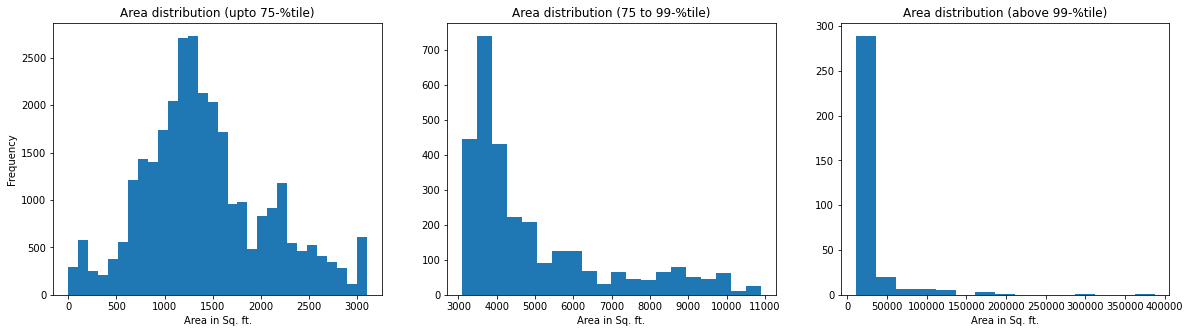

In [163]:
# subset data for areas upto 90 percentiles
area_90 = df_noAmenity[df_noAmenity['area'] <= area_desc['90%']]

# subset data for areas above 90 and upto 99 percentiles
area_90_99 = df_noAmenity[(df_noAmenity['area'] > area_desc['90%']) & (df_noAmenity['area'] <= area_desc['99%'])]

# subset data for areas above 99 percentiles
area_99_100 = df_noAmenity[(df_noAmenity['area'] > area_desc['99%'])]

# Create a Figure and an Axes for a 2-column grid of subplots
fig, ax = plt.subplots(1,3)

# First plot
ax[0].hist(area_90['area'], bins=30)
ax[0].set_xlabel('Area in Sq. ft.')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Area distribution (upto 75-%tile)')

# Second plot
ax[1].hist(area_90_99['area'], bins=20)
ax[1].set_xlabel('Area in Sq. ft.')
ax[1].set_title('Area distribution (75 to 99-%tile)')

# Third plot
ax[2].hist(area_99_100['area'], bins=15)
ax[2].set_xlabel('Area in Sq. ft.')
ax[2].set_title('Area distribution (above 99-%tile)')

# Adjust the size of the figure
fig.set_size_inches([20,5])

plt.show()

In [164]:
# area['area'].value_counts()

In [165]:
# What are the area values for properties with area above 99-%tile
# df_noAmenity[df_noAmenity['area'] >= area_desc['99%']]

In [166]:
df_noAmenity[df_noAmenity['area'] <= 100].shape
# df_noAmenity[df_noAmenity['area'] < 10]['property_url']

(293, 15)

<br>

# Property descriptions: _building_type_, _building_nature_

## (i) _building_type_

In [167]:
df_noAmenity['building_type'].value_counts()

Apartment                       26291
Office                           2156
Building                         1420
Land                             1342
Shop                             1060
Floor                             885
Plot                              809
Garage                            457
Apartment/Flats                   378
Commercial Space                  249
House                             221
Duplex                             77
Office space                       52
Warehouse                          30
Factory                            19
Duplex Home                         7
Commerical - Other                  4
Independent House                   2
Showroom / Shop / Restaurant        2
Apartment, Commercial               2
Commercial property                 2
Name: building_type, dtype: int64

**NOTE: There seems to be some repetitions of types. Let's combine the related values into unique types**

In [168]:
# Combine the related values into one

# The following types are combined into one
# 
# Apartment: Apartment;  Apartment/Flats;  Apartment, Commercial
# Office:  Office;  Office space
# Commercial Space:  Commercial Space;  Commerical - Other;  Commercial property
# Shop:  Shop;  Showroom / Shop / Restaurant
# House:  House;  Independent House
# Duplex:  Duplex;  Duplex Home

# Create a new column
df_noAmenity['building_type_comb'] = df_noAmenity['building_type']

df_noAmenity['building_type_comb'] = np.where(df_noAmenity['building_type_comb'].str.contains('Apartment'), 
                                          'Apartment', df_noAmenity['building_type_comb'])

df_noAmenity['building_type_comb'] = np.where(df_noAmenity['building_type_comb'].str.contains('Office'), 
                                          'Office', df_noAmenity['building_type_comb'])

df_noAmenity['building_type_comb'] = np.where(df_noAmenity['building_type_comb'].str.contains('Commercial'), 
                                          'Commercial Space', df_noAmenity['building_type_comb'])

# Correct the typo!
df_noAmenity['building_type_comb'] = np.where(df_noAmenity['building_type_comb'].str.contains('Commerical'), 
                                          'Commercial Space', df_noAmenity['building_type_comb'])

df_noAmenity['building_type_comb'] = np.where(df_noAmenity['building_type_comb'].str.contains('Shop'), 
                                          'Shop', df_noAmenity['building_type_comb'])

df_noAmenity['building_type_comb'] = np.where(df_noAmenity['building_type_comb'].str.contains('House'), 
                                          'House', df_noAmenity['building_type_comb'])

# Although a 'Duplex' is a special kind of 'House', let's keep it as a separate type
df_noAmenity['building_type_comb'] = np.where(df_noAmenity['building_type_comb'].str.contains('Duplex'), 
                                          'Duplex', df_noAmenity['building_type_comb'])


In [169]:
df_noAmenity['building_type_comb'].value_counts()

Apartment           26852
Office               2208
Building             1420
Land                 1342
Shop                 1062
Floor                 885
Plot                  809
Garage                457
Commercial Space      255
House                 223
Duplex                 84
Warehouse              30
Factory                19
Name: building_type_comb, dtype: int64

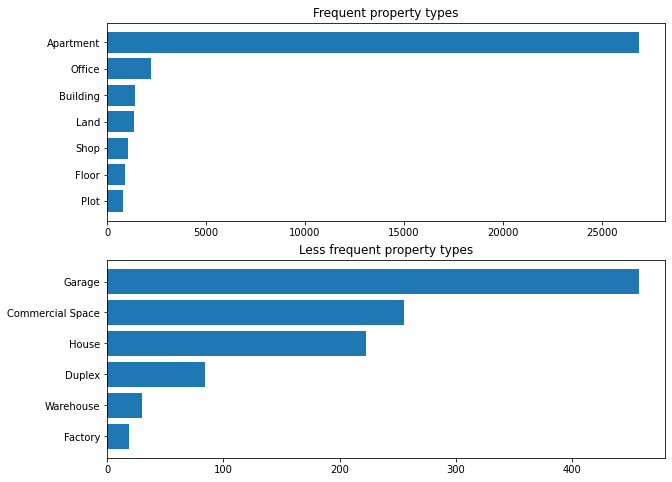

In [170]:
ind = 6

freq = df_noAmenity['building_type_comb'].value_counts()[ind::-1]
less_freq = df_noAmenity['building_type_comb'].value_counts()[-1:ind:-1]

fig, ax = plt.subplots(2,1)

# First plot
ax[0].barh(freq.index, freq)
ax[0].set_title('Frequent property types')

# # Second plot
ax[1].barh(less_freq.index, less_freq)
ax[1].set_title('Less frequent property types')

# Adjust the size of the figure
fig.set_size_inches([10,8])

plt.show()

## (ii) building_nature

In [171]:
df_noAmenity['building_nature'].value_counts()

Residential    28892
Commercial      6754
Name: building_nature, dtype: int64

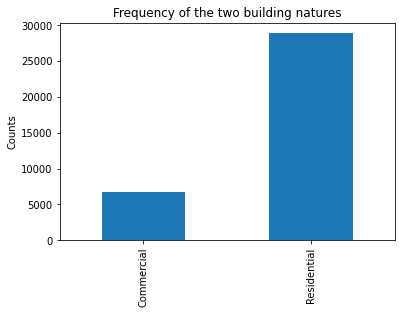

In [172]:
df_noAmenity['building_nature'].value_counts().sort_index().plot(kind='bar')

# Add labels and title
plt.ylabel('Counts')
plt.title('Frequency of the two building natures')
plt.show()

<br>

# Bathrooms & bedrooms

## (i) Bathrooms

In [173]:
df_noAmenity['num_bath_rooms'].value_counts()[:10]

0.0      15524
3.0       8595
2.0       5526
4.0       3117
1.0       1321
5.0        620
 4 ba      170
3          148
6.0        145
 3 ba      142
Name: num_bath_rooms, dtype: int64

In [174]:
df_noAmenity['num_bed_rooms'].value_counts()[:10]

3.0      16554
0.0       8700
2.0       5797
4.0       2707
1.0        657
5.0        270
 3 bd      253
3          183
 4 bd      117
6.0         87
Name: num_bed_rooms, dtype: int64

**NOTE: The values are *'num_bath_rooms'* and *'num_bed_rooms'* are not numeric**

**Clean-up the columns and convert the values numeric**

In [175]:
# Format the two columns
df_noAmenity['num_bath_rooms'] = np.where(df_noAmenity['num_bath_rooms'].str.contains(' ba'), 
                                          df_noAmenity['num_bath_rooms'].str.split(' ')[1], 
                                          df_noAmenity['num_bath_rooms'])


df_noAmenity['num_bed_rooms'] = np.where(df_noAmenity['num_bed_rooms'].str.contains(' bd'), 
                                          df_noAmenity['num_bed_rooms'].str.split(' ')[1], 
                                          df_noAmenity['num_bed_rooms'])


In [176]:
# df_noAmenity[df_noAmenity['num_bath_rooms'].str.contains(' ba')]

In [177]:
print(df_noAmenity['num_bath_rooms'].dtype)
print(df_noAmenity['num_bed_rooms'].dtype)

object
object


In [178]:
df_noAmenity['num_bath_rooms'] = df_noAmenity['num_bath_rooms'].astype('float')
df_noAmenity['num_bed_rooms'] = df_noAmenity['num_bed_rooms'].astype('float')

In [179]:
print(df_noAmenity['num_bath_rooms'].dtype)
print(df_noAmenity['num_bed_rooms'].dtype)

float64
float64


In [180]:
df_noAmenity['num_bath_rooms'].value_counts()

0.0     15526
3.0      8743
2.0      5570
4.0      3613
1.0      1321
5.0       631
6.0       146
10.0       32
8.0        28
7.0        20
9.0         8
12.0        2
26.0        1
13.0        1
16.0        1
18.0        1
36.0        1
31.0        1
Name: num_bath_rooms, dtype: int64

In [181]:
df_noAmenity['num_bed_rooms'].value_counts()

3.0     17178
0.0      8702
2.0      5822
4.0      2755
1.0       657
5.0       273
6.0        87
7.0        46
8.0        26
10.0       18
12.0       10
9.0         9
18.0        7
24.0        6
21.0        5
14.0        4
16.0        4
36.0        3
20.0        3
11.0        3
25.0        3
15.0        2
13.0        2
19.0        2
32.0        2
17.0        2
56.0        2
22.0        1
33.0        1
46.0        1
94.0        1
30.0        1
50.0        1
42.0        1
75.0        1
23.0        1
29.0        1
60.0        1
48.0        1
40.0        1
Name: num_bed_rooms, dtype: int64

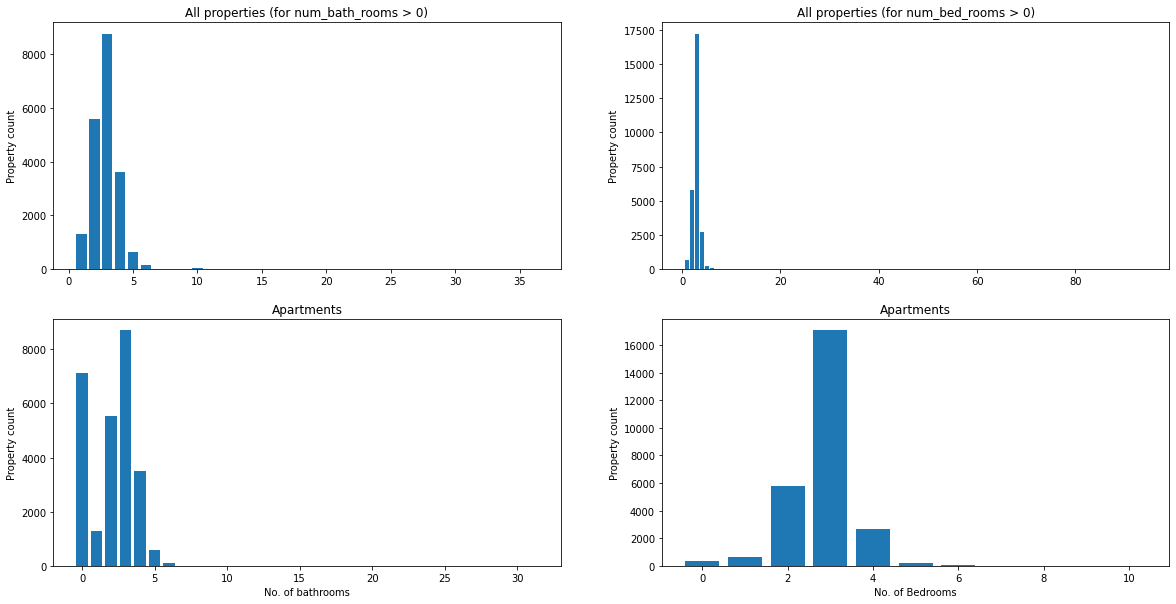

In [182]:
nBathrooms = df_noAmenity[df_noAmenity['num_bath_rooms'] > 0]['num_bath_rooms'].value_counts()
nBedrooms = df_noAmenity[df_noAmenity['num_bed_rooms'] > 0]['num_bed_rooms'].value_counts()

nApBathrooms = df_noAmenity[(df_noAmenity['building_type_comb'] == 'Apartment')]['num_bath_rooms'].value_counts()
nApBedrooms = df_noAmenity[(df_noAmenity['building_type_comb'] == 'Apartment')]['num_bed_rooms'].value_counts()


# Create a Figure and an Axes for a 2-column grid of subplots
fig, ax = plt.subplots(2,2)

# Bathroom plot
ax[0, 0].bar(nBathrooms.index, nBathrooms)

# Add labels and title
ax[0, 0].set_ylabel('Property count')
ax[0, 0].set_title('All properties (for num_bath_rooms > 0)')


# Bedroom plot
ax[0, 1].bar(nBedrooms.index, nBedrooms)

# Add labels and title
ax[0, 1].set_ylabel('Property count')
ax[0, 1].set_title('All properties (for num_bed_rooms > 0)')


# Bathroom plot
ax[1, 0].bar(nApBathrooms.index, nApBathrooms)

# Add labels and title
ax[1, 0].set_xlabel('No. of bathrooms')
ax[1, 0].set_ylabel('Property count')
ax[1, 0].set_title('Apartments')


# Bedroom plot
ax[1, 1].bar(nApBedrooms.index, nApBedrooms)

# Add labels and title
ax[1, 1].set_xlabel('No. of Bedrooms')
ax[1, 1].set_ylabel('Property count')
ax[1, 1].set_title('Apartments')


# Adjust the size of the figure
fig.set_size_inches([20,10])
plt.show()

<br>

# Price

In [183]:
# df_noAmenity.columns

In [184]:
df_noAmenity['price'].describe(percentiles=[.3, .6, .9, .99])

count    3.457800e+04
mean     1.046375e+09
std      1.301329e+11
min      0.000000e+00
30%      3.200000e+04
50%      1.750000e+05
60%      1.800000e+06
90%      1.200000e+07
99%      8.700000e+07
max      2.400000e+13
Name: price, dtype: float64

In [185]:
df_noAmenity[df_noAmenity['purpose'] == 'Sale']['price'].describe(percentiles=[.3, .6, .9, .99])

count    1.445000e+04
mean     2.483006e+09
std      2.012964e+11
min      1.000000e+00
30%      5.200000e+06
50%      7.000225e+06
60%      8.150000e+06
90%      2.100000e+07
99%      4.093044e+09
max      2.400000e+13
Name: price, dtype: float64

In [186]:
df_noAmenity[df_noAmenity['purpose'] == 'Rent']['price'].describe(percentiles=[.3, .6, .9, .99])

count    2.011900e+04
mean     1.248472e+07
std      8.867910e+08
min      0.000000e+00
30%      2.000000e+04
50%      3.000000e+04
60%      4.500000e+04
90%      2.700000e+05
99%      1.500000e+06
max      1.000000e+11
Name: price, dtype: float64

In [187]:
# df_noAmenity[df_noAmenity['purpose'] == 'Sale'].groupby('building_type_comb', as_index=False)['price'].mean()

In [188]:
# df_noAmenity[df_noAmenity['purpose'] == 'Rent'].groupby('building_type_comb', as_index=False)['price'].mean()

**Calculate mean prices for each building_type and for "Sale" and "Rent" separately**

In [189]:
# Calculate 'Sale' and 'Rent' means separately and merge
df_mean_price = pd.merge(df_noAmenity[df_noAmenity['purpose'] == 'Sale'].groupby('building_type_comb', as_index=False)['price'].mean(), 
         df_noAmenity[df_noAmenity['purpose'] == 'Rent'].groupby('building_type_comb', as_index=False)['price'].mean(), 
         on='building_type_comb', how='outer', suffixes = ['_sale', '_rent']).fillna(0)


In [190]:
df_mean_price
# df_mean_price.sort_values(by = ['price_sale'], ascending = False)

,building_type_comb,price_sale,price_rent
0,Apartment,2.573413e+09,6.832983e+06
1,Building,7.466818e+07,1.138637e+08
2,Commercial Space,6.967286e+07,0.000000e+00
3,Duplex,4.528889e+07,2.824167e+05
4,Floor,4.999938e+07,4.800843e+05
5,House,1.241668e+11,3.016898e+05
6,Land,1.042472e+07,0.000000e+00
7,Office,3.907789e+07,2.561775e+05
8,Plot,2.765887e+07,2.708750e+05
9,Shop,4.774180e+06,2.803508e+05


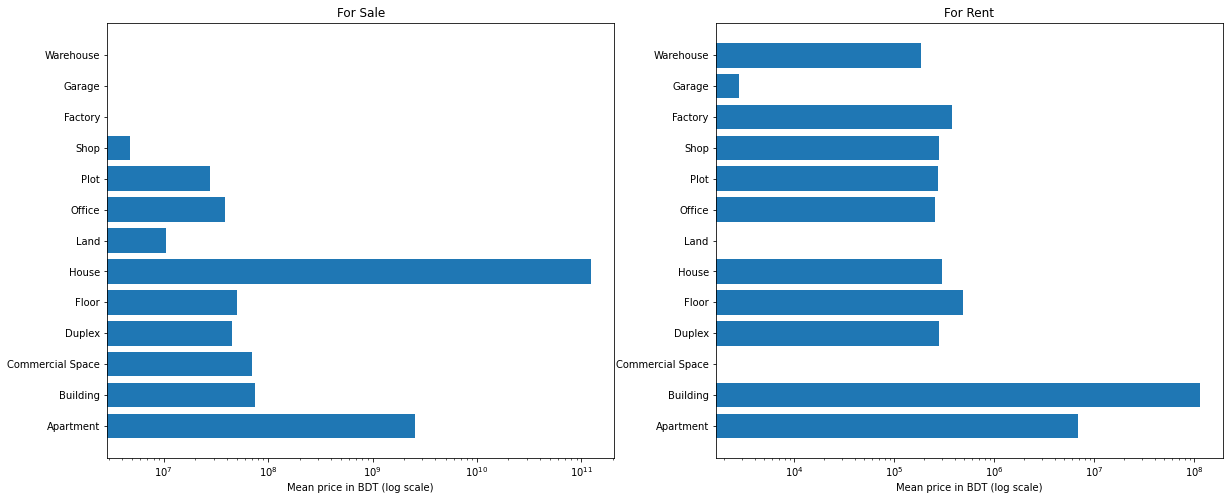

In [191]:
fig, ax = plt.subplots(1,2)

# First plot
ax[0].barh(df_mean_price['building_type_comb'], df_mean_price['price_sale'])
ax[0].set_title('For Sale')
ax[0].set_xscale('log')
ax[0].set_xlabel('Mean price in BDT (log scale)')


# # Second plot
ax[1].barh(df_mean_price['building_type_comb'], df_mean_price['price_rent'])
ax[1].set_title('For Rent')
ax[1].set_xscale('log')
ax[1].set_xlabel('Mean price in BDT (log scale)')

# Adjust the size of the figure
fig.set_size_inches([20,8])

plt.show()

<br>

# Purpose


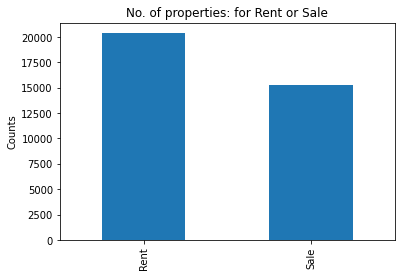

In [192]:
df_noAmenity['purpose'].value_counts().sort_index().plot(kind='bar')

# Add labels and title
plt.ylabel('Counts')
plt.title('No. of properties: for Rent or Sale')
plt.show()

In [193]:
df_noAmenity['building_type_comb'] = np.where(df_noAmenity['building_type_comb'].str.contains('Apartment'), 
                                          'Apartment', df_noAmenity['building_type_comb'])


<br>

# City


In [194]:
df_noAmenity['city'].value_counts()

Dhaka               29215
Chattogram           3553
Gazipur               465
Narayanganj City      441
Barishal              397
                    ...  
Sunamganj               2
Jhalokati               1
Pirojpur                1
Gopalganj               1
Lakshmipur              1
Name: city, Length: 61, dtype: int64

In [195]:
# Correct the typo: ' Dhaka' -> 'Dhaka'

df_noAmenity['city'] = np.where(df_noAmenity['city'] == ' Dhaka', 'Dhaka', df_noAmenity['city'])


In [196]:
df_noAmenity['city'].unique()

array(['Dhaka', 'Chattogram', 'Narayanganj City', 'Gazipur', 'Sylhet',
       nan, 'Chittagong', 'Narayanganj', 'Pabna', 'Khulna', 'Jhenaidah',
       'Rajshahi', 'Rangpur', 'Dinajpur', 'Kushtia', 'Bogura', 'Barishal',
       'Thakurgaon', 'Manikganj', 'Barguna', 'Mymensingh', 'Faridpur',
       'Narsingdi', 'Magura', 'Jamalpur', 'Feni', 'Madaripur', 'Jashore',
       'Noakhali', 'Cumilla', 'Nawabganj', 'Tangail', 'Satkhira',
       "Cox's Bazar", 'Gaibandha', 'Habiganj', 'Netrakona', 'Chandpur',
       'Sherpur', 'Moulvibazar', 'Naogaon', 'Pirojpur', 'Panchagarh',
       'Bandarban', 'Jhalokati', 'Bagerhat', 'Sirajganj', 'Shariatpur',
       'Sunamganj', 'Patuakhali', 'Natore', 'Bhola', 'Rajbari',
       'Joypurhat', 'Rangamati', 'Kishoreganj', 'Munshiganj',
       'Brahmanbaria', 'Nilphamari', 'Gopalganj', 'Lakshmipur'],
      dtype=object)

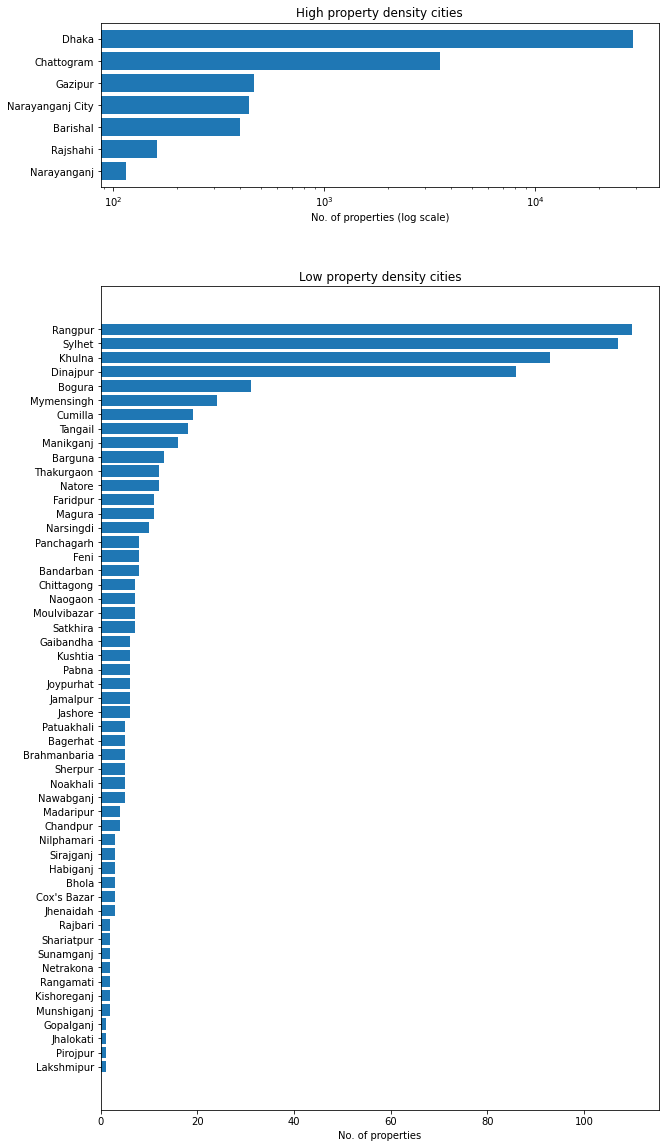

In [197]:
ind = 6

freq = df_noAmenity['city'].value_counts()[ind::-1]
less_freq = df_noAmenity['city'].value_counts()[-1:ind:-1]

fig = plt.figure()
ax = fig.subplots(2, 1, height_ratios=[0.8, 4])

# First plot
ax[0].barh(freq.index, freq)
ax[0].set_title('High property density cities')
ax[0].set_xlabel('No. of properties (log scale)')
ax[0].set_xscale('log')

# # Second plot
ax[1].barh(less_freq.index, less_freq)
ax[1].set_title('Low property density cities')
ax[1].set_xlabel('No. of properties')
# ax[1].set_xscale('linear')

# Adjust the size of the figure
fig.set_size_inches([10,20])

plt.show()

<br>

# Locality


In [198]:
df_noAmenity['locality'].value_counts()[:10]

Mirpur             5262
Bashundhara R-A    1405
Uttara             1348
Bashundhara RA     1236
Mohammadpur        1064
Dhanmondi          1035
Banashree          1033
Badda               987
Baridhara           986
Banani              890
Name: locality, dtype: int64

In [199]:
df_noAmenity['locality'].unique()

array(['Khilgaon', 'Dhanmondi', 'Mirpur', 'Bashundhara R-A', 'Banasree',
       'Banani', 'Uttara', 'Sutrapur', 'Gulshan', 'Badda', 'Rampura',
       'Mohammadpur', 'Turag', 'Shyamoli', 'Ibrahimpur', 'Aftab Nagar',
       'Baridhara', 'Bashabo', 'Khulshi', 'Agargaon', 'Tejgaon',
       'Cantonment', 'Kalabagan', 'Adabor', '10 No. North Kattali Ward',
       'Kakrail', 'Eskaton', nan, 'Kathalbagan', 'Nikunja', 'Hazaribag',
       'Motijheel', 'Malibagh', 'Keraniganj', 'Bangshal', 'Shyampur',
       'Demra', 'Maghbazar', 'Muradpur', 'Double Mooring', 'Kuril',
       'Halishahar', '15 No. Bagmoniram Ward', 'Shiddheswari',
       'Shahjahanpur', 'Jatra Bari', 'Dakshin Khan', 'New Market',
       '9 No. North Pahartali Ward', '4 No Chandgaon Ward',
       'Uttar Lalkhan', 'Bayazid', 'Mohakhali', 'Banani Dohs',
       'Hatirpool', 'Lal Khan Bazaar', 'Purbachal', 'Sholokbahar',
       'East Nasirabad', 'Panchlaish', 'Kafrul',
       '33 No. Firingee Bazaar Ward', 'Bakalia', 'Lalbagh', 'Jamal 

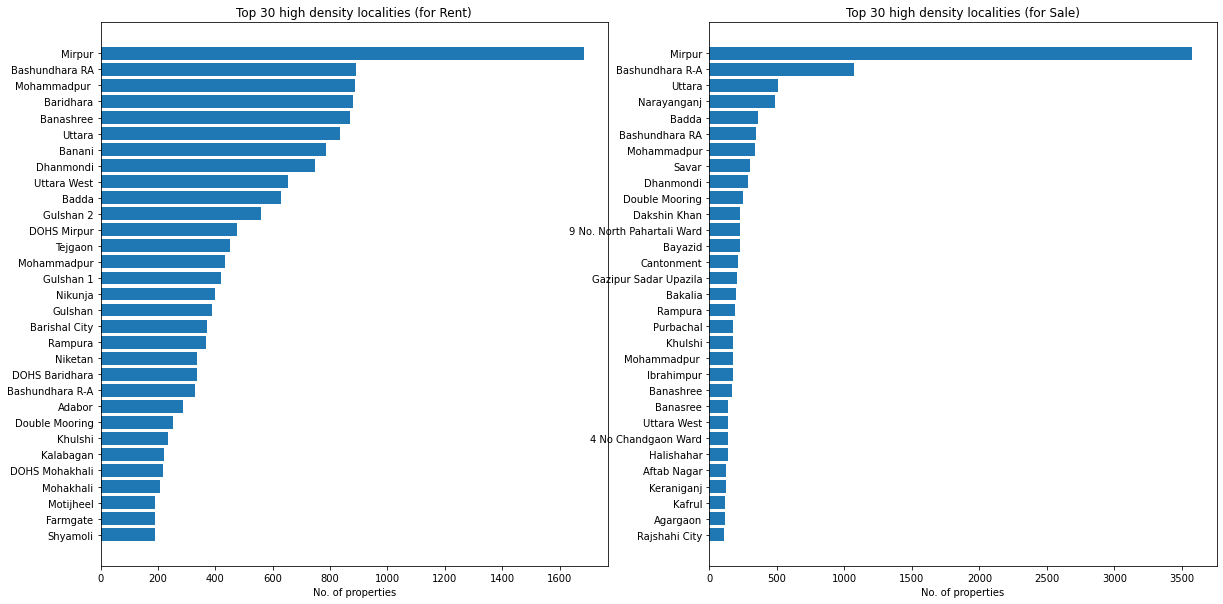

In [200]:
ind = 30

freq_rent = df_noAmenity[df_noAmenity['purpose'] == 'Rent']['locality'].value_counts()[ind::-1]
freq_sale = df_noAmenity[df_noAmenity['purpose'] == 'Sale']['locality'].value_counts()[ind::-1]
# less_freq = df_noAmenity['city'].value_counts()[-1:ind:-1]


# freq = freq_sale

fig = plt.figure()
ax = fig.subplots(1,2)

# First plot
ax[0].barh(freq_rent.index, freq_rent)
ax[0].set_title('Top 30 high density localities (for Rent)')
ax[0].set_xlabel('No. of properties')
# ax.set_xscale('log')

# Second plot
ax[1].barh(freq_sale.index, freq_sale)
ax[1].set_title('Top 30 high density localities (for Sale)')
ax[1].set_xlabel('No. of properties')
# ax.set_xscale('log')

# Adjust the size of the figure
fig.set_size_inches([20,10])

plt.show()